In [13]:
#installed from !pip install git+https://github.com/engcarlo/Technical-Analysis-Indicators---Pandas.git@patch-1

import yfinance as yf
import mplfinance as mpf
import pandas_ta as ta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from dateutil.relativedelta import relativedelta
# import pandas_datareader as pdr

In [147]:
# data = yf.download("^NSEI", start="2017-01-01", end="2025-04-30", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [148]:
data.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

In [12]:
data

Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2017-01-02,8179.500000,8212.000000,8133.799805,8210.099609,118300
2017-01-03,8192.250000,8219.099609,8148.600098,8196.049805,127300
2017-01-04,8190.500000,8218.500000,8180.899902,8202.650391,132400
2017-01-05,8273.799805,8282.650391,8223.700195,8226.650391,159100
2017-01-06,8243.799805,8306.849609,8233.250000,8281.849609,139400
...,...,...,...,...,...
2017-04-24,9217.950195,9225.400391,9130.549805,9135.349609,167700
2017-04-25,9306.599609,9309.200195,9250.349609,9273.049805,168700


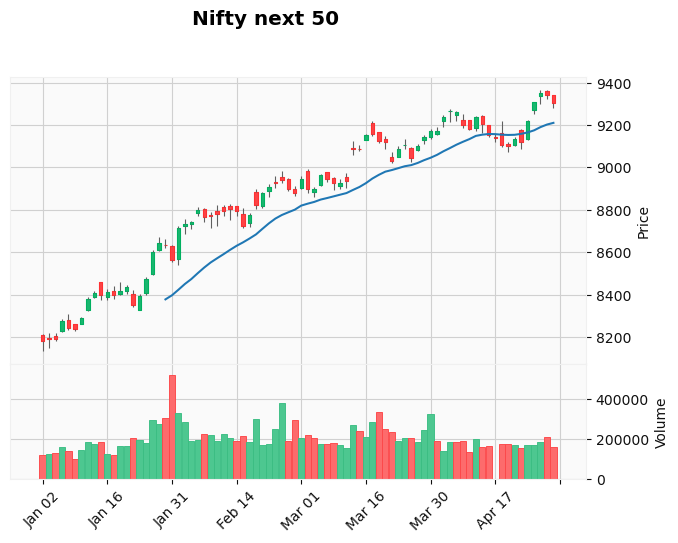

In [52]:
mpf.plot(data, type='candle', title="Nifty next 50", style='yahoo', mav=(20), volume=True)

In [20]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import statsmodels.api as sm

In [21]:
df = pd.DataFrame(data["Close"])
df.reset_index(inplace=True)
df.columns = ["Date", "Close"]
Y = df["Close"]
X = sm.add_constant(df.index.values)

model = OLS(Y, X).fit()
print(model.summary())

from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(model.resid)

print(dw)

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     882.7
Date:                Sun, 11 May 2025   Prob (F-statistic):           2.78e-44
Time:                        15:53:49   Log-Likelihood:                -476.43
No. Observations:                  80   AIC:                             956.9
Df Residuals:                      78   BIC:                             961.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8318.5413     20.946    397.149      0.0

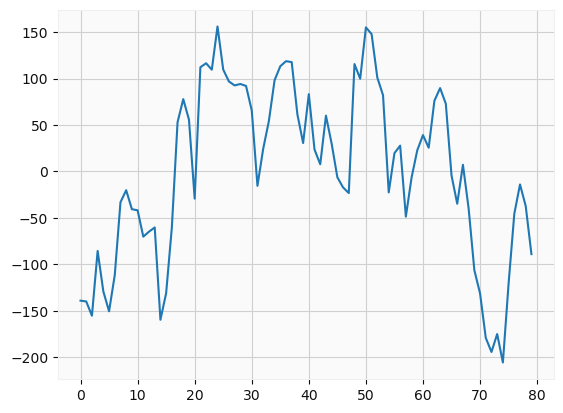

In [32]:
plt.plot(model.resid)

<Axes: xlabel='y(t)', ylabel='y(t + 10)'>

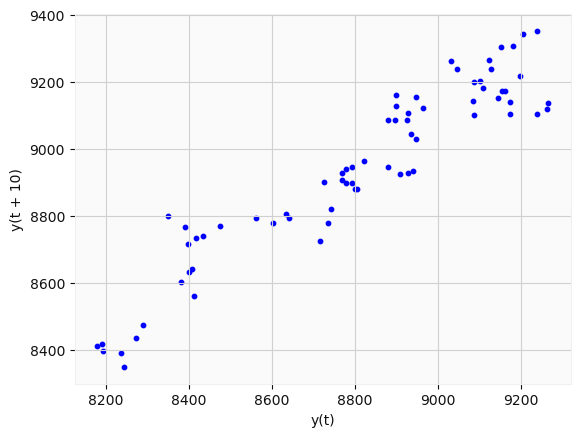

In [22]:
pd.plotting.lag_plot(df["Close"], lag=10, c="blue", s=10)

In [27]:
dw

0.2760654820211054

In [36]:
# 

data["sma_20"]= ta.sma(data["Close"], window=20)
data["sma_50"]= ta.sma(data["Close"], window=50)
data["sma_200"]= ta.sma(data["Close"], window=200)

In [56]:
data

,Close,High,Low,Open,Volume,sma_20,sma_50,sma_200
Date,,,,,,,,
2017-01-02,8179.500000,8212.000000,8133.799805,8210.099609,118300,NaN,NaN,NaN
2017-01-03,8192.250000,8219.099609,8148.600098,8196.049805,127300,NaN,NaN,NaN
2017-01-04,8190.500000,8218.500000,8180.899902,8202.650391,132400,NaN,NaN,NaN
2017-01-05,8273.799805,8282.650391,8223.700195,8226.650391,159100,NaN,NaN,NaN
2017-01-06,8243.799805,8306.849609,8233.250000,8281.849609,139400,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2017-04-24,9217.950195,9225.400391,9130.549805,9135.349609,167700,9159.440137,9159.440137,9159.440137
2017-04-25,9306.599609,9309.200195,9250.349609,9273.049805,168700,9171.955078,9171.955078,9171.955078
2017-04-26,9351.849609,9367.000000,9301.349609,9336.200195,185700,9183.440039,9183.440039,9183.440039


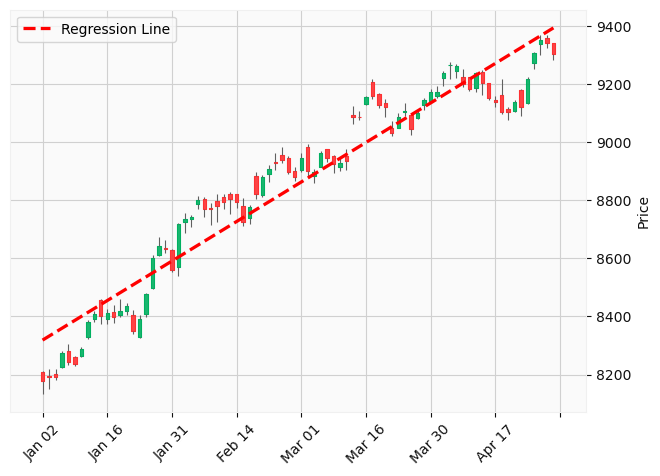

In [55]:
import pandas as pd
import statsmodels.api as sm
import mplfinance as mpf

# Assuming 'data' is your DataFrame with the candlestick data and 'Close' prices
# and the OLS model has already been fit as in your code:
df = pd.DataFrame(data["Close"])
df.reset_index(inplace=True)
df.columns = ["Date", "Close"]
Y = df["Close"]
X = sm.add_constant(df.index.values)

model = sm.OLS(Y, X).fit()

# Extract intercept and slope from the model
intercept, slope = model.params

# Generate y-values for the regression line
regression_line = intercept + slope * df.index.values

# Create a DataFrame for the regression line with the same index as 'data'
regression_df = pd.DataFrame({
    'Date': df['Date'],
    'Regression': regression_line
}).set_index('Date')

# Ensure the regression line DataFrame aligns with the 'data' DataFrame index
regression_df = regression_df.reindex(data.index)

# Create addplot for the regression line
ap_regression = mpf.make_addplot(regression_df['Regression'], color='red', linestyle='--', label='Regression Line')

# Existing RSI addplot
# ap_rsi = mpf.make_addplot(data['RSI'], panel=2, color='blue', ylabel='RSI')

# Combine both addplots
addplots = [ap_regression]

# Plot the candlestick chart with RSI and regression line
mpf.plot(data, type='candle', addplot=addplots,  style='yahoo')
# --, title='Candlestick with Regression Line')

In [58]:
print(intercept, slope)

8318.541344762732 13.600629832450588


<Axes: >

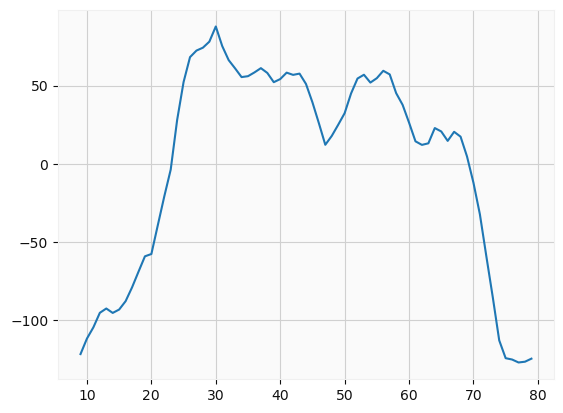

In [44]:
model.resid.plot()

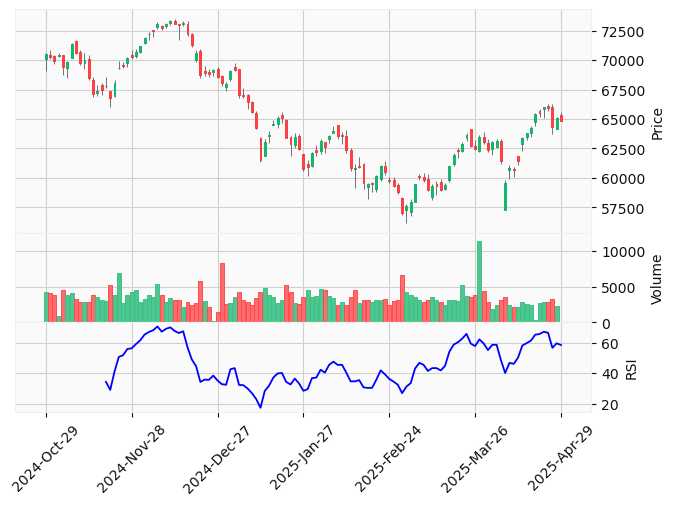

In [32]:


# Calculate RSI
data['RSI'] = ta.rsi(data['Close'], length=14)



ap = mpf.make_addplot(data['RSI'], panel=2, color='blue', ylabel='RSI')
mpf.plot(data, type='candle', addplot=ap, volume=True,style='yahoo')

In [24]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

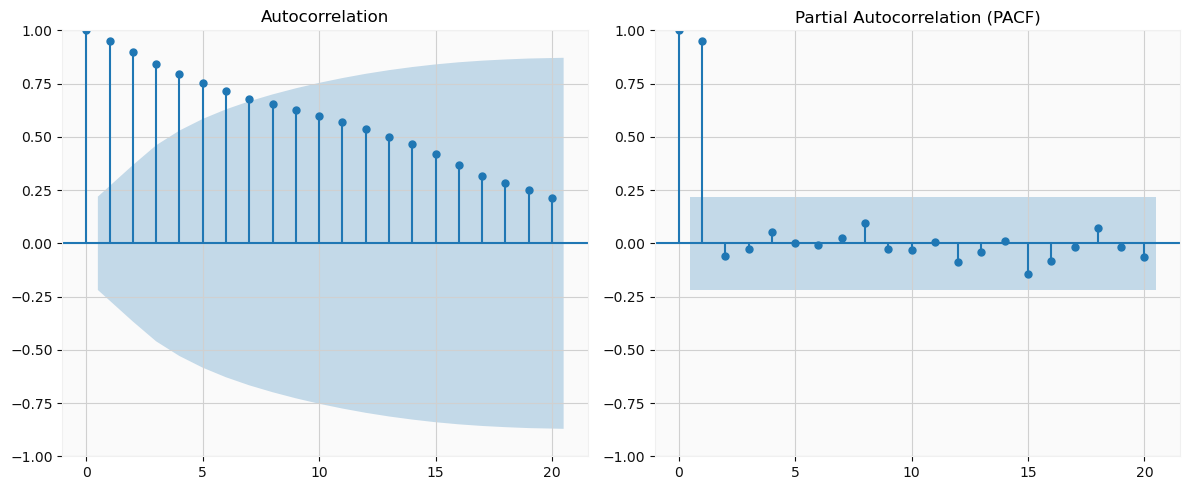

In [53]:
plt.figure(figsize=(12, 5))

# Autocorrelation (ACF)
plt.subplot(1, 2, 1)
plot_acf(data["Close"], lags=20, ax=plt.gca())

# Partial Autocorrelation (PACF)
plt.subplot(1, 2, 2)
plot_pacf(data["Close"], lags=20, ax=plt.gca())
plt.title("Partial Autocorrelation (PACF)")

plt.tight_layout()
plt.show()

C:\Users\69292\AppData\Local\Temp\ipykernel_60696\2283618303.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Forward fill missing values
C:\Users\69292\AppData\Local\Temp\ipykernel_60696\2283618303.py:11: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_year = df.last('1Y')
C:\Users\69292\AppData\Local\Temp\ipykernel_60696\2283618303.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  last_year = df.last('1Y')


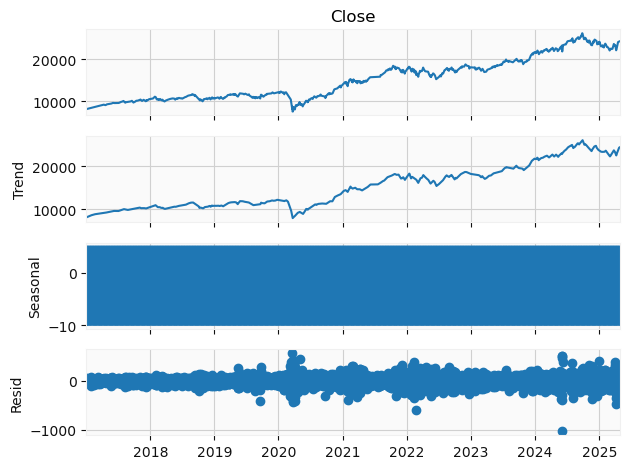

In [151]:
import statsmodels.api as sm
# Ensure the index has a frequency
df = data[["Close"]].copy()
# df.set_index("Date", inplace=True)
df.index = pd.to_datetime(df.index)
df = df.asfreq('D')  # Set frequency to daily
df.fillna(method='bfill', inplace=True)  # Forward fill missing values

# Perform seasonal decomposition
# Filter the last 1 year of data for plotting
last_year = df.last('1Y')

# Perform seasonal decomposition on the entire dataset
_decompose = sm.tsa.seasonal_decompose(df["Close"], model='additive')

_decompose.plot()
plt.show()

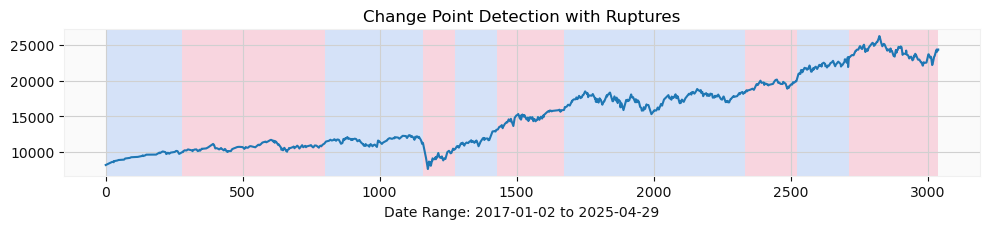

Breakpoints detected at dates: [datetime.date(2017, 10, 8), datetime.date(2019, 3, 12), datetime.date(2020, 3, 6), datetime.date(2020, 6, 29), datetime.date(2020, 12, 1), datetime.date(2021, 8, 3), datetime.date(2023, 5, 25), datetime.date(2023, 12, 1), datetime.date(2024, 6, 8), datetime.date(2025, 4, 29)]


In [156]:
# identify the breakpoints 

# from ruptures import Pelt, Binseg, BottomUp, rpt
# from ruptures.metrics import cost
import ruptures as rpt

# Convert the 'Close' column to a numpy array for compatibility with ruptures
# close_prices = df.last('1Y').values
close_prices = df.values

# Initialize the Pelt algorithm with the "l2" cost model
algo = rpt.Pelt(model="rbf").fit(close_prices)

# Predict the breakpoints with a penalty value
result = algo.predict(pen=10)

# Display the results
# Convert the result indices to corresponding dates
breakpoint_dates = [df.index[point-1].date() for point in result]

# Display the results with dates
rpt.display(close_prices, result)
plt.title("Change Point Detection with Ruptures")
plt.xlabel(f"Date Range: {df.index.min().date()} to {df.index.max().date()}")
plt.show()

# Print the breakpoint dates
print("Breakpoints detected at dates:", breakpoint_dates)

In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import yfinance as yf
from datetime import datetime, timedelta

df = data.copy()
# df.reset_index(inplace=True)
df.index = pd.to_datetime(df.index)
df = df.asfreq('D')  # Set frequency to daily
df.fillna(method='bfill', inplace=True)  # Forward fill missing values

window_size =40

# Segment the time series (using Close prices)
segments = [df['Close'].values[i:i + window_size] 
            for i in range(0, len(df) - window_size + 1, window_size)]
segments = np.array([s for s in segments if len(s) == window_size]) 

segments_scaled = TimeSeriesScalerMeanVariance().fit_transform(segments)

# Cluster segments using TimeSeriesKMeans with DTW
n_clusters = 3
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", random_state=42, max_iter=50)
labels = model.fit_predict(segments_scaled)

# Prepare cluster colors
cluster_colors = ['blue', 'red', 'green', 'purple']
color_map = {i: cluster_colors[i] for i in range(n_clusters)}

# Create additional plot data for mplfinance

expanded_labels = np.repeat(labels, window_size)


C:\Users\69292\AppData\Local\Temp\ipykernel_60696\2387186054.py:14: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [305]:
segments_scaled.shape

(76, 40, 1)

In [293]:
df["Cluster"] = expanded_labels

In [294]:
df.reset_index(inplace=True)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='Candlestick'
)])

# Add the area chart for the 'Cluster' column
unique_clusters = df['Cluster'].unique()
cluster_colors = px.colors.qualitative.Set1  # Use a predefined color set



# Update layout
fig.update_yaxes(fixedrange=False)
fig.update_layout(
    xaxis_rangeslider_visible=True,
    xaxis_title='Date',
    yaxis_title='Price',
    title='Stock Price Chart with Clusters',
    # template='plotly_dark',
    hovermode='x unified'
)

fig.show()

In [289]:
color_map

{0: 'blue', 1: 'red', 2: 'green'}

In [303]:
import plotly.graph_objects as go

unique_clusters = df['Cluster'].unique()

# Create a bar chart with color-coded bars based on the 'Cluster' column
fig = go.Figure()

unique_clusters = df['Cluster'].unique()

fig = go.Figure(data=[go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='Candlestick'
)])

# Add bars for each unique cluster with corresponding colors
for cluster_id in unique_clusters:
    cluster_data = df[df['Cluster'] == cluster_id]
    fig.add_trace(go.Bar(
        x=cluster_data['Date'],
        y=cluster_data['Close'],
        marker_color=color_map[cluster_id],
        name=f'Cluster {cluster_id}'
    ))

# Add a range slider



fig.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True),
        title='Date'
    ),
    yaxis=dict(title='Close Price'),
    title='Nity50 Clusters K-Means Clustersing with simple mean normalization',
    barmode='stack'
)

fig.show()
